In [2]:
library("tidyverse")
library("ranger")
library("Amelia")
library("caret")
library("pROC")
library("diversityForest")
library("Metrics")
# it's called data_agri but it's actually all sectors
data_agri <- read.csv("Final_Data_01.csv",sep=';')
data_econ <-read_csv("econ_data_new_2.csv")
clusters_econ<-read_csv("econ_cluster.csv")

# only select C 
data_econ = data_econ[data_econ$sector=='C',]
data_agri = data_agri[data_agri$sector=='C',]
#merge with  economic data
data_final_01<-merge(x = data_agri, y = data_econ, by = c("geo","year"), all.x = TRUE)
#merge with  economic clusters
data_final_01<-merge(x = data_final_01, y = clusters_econ, by = c("geo"), all.x = TRUE)

cluster_climate_variables<-read_csv("cluster_climate_variables.csv")

cluster_climate_variables <- cluster_climate_variables %>% select(-c('...1'))
# merge with climate clusters
data_final_01<-merge(x = data_final_01, y = cluster_climate_variables, by = c("geo"), all.x = TRUE)

vars_to_drop<-c('X','geo','sector.x','sector.y','gdp.x',
                'gdp.y','country','share','gva','gva_emp',
'gva_emp_gr','area.y','gva_area','empl','gva_area_gr','GVA','gva_area_log_diff','gva_emp_log_diff','gva_gr','gva_log_diff',
                'country','share','gdp.y','cluster_A')

data_final_01 <- data_final_01 %>% select(-vars_to_drop)

data_final_01 <- data_final_01 %>% filter(is.finite(gva__gr))

data_final_01 <- drop_na(data_final_01)
#remove 2018
data_final_01 <- data_final_01[data_final_01$year!=2018,]
#validation_set <-data_final_01[data_final_01$year==2017,]

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2023 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects a

In [49]:
write.csv(data_final_01,'data_C_sector.csv')

In [3]:
data_final_01$year<-NULL

In [4]:
## actually manifactury, no agriculture 
## train interaction forests
model_df_agriculture <- interactionfor(dependent.variable.name = "gva__gr", 
                           data = data_final_01, max.depth=10,
num.trees = 2500, seed=36)

Growing trees.. Progress: 81%. Estimated remaining time: 7 seconds.
Computing EIM values.. Progress: 4%. Estimated remaining time: 12 minutes, 56 seconds.
Computing EIM values.. Progress: 8%. Estimated remaining time: 12 minutes, 12 seconds.
Computing EIM values.. Progress: 12%. Estimated remaining time: 11 minutes, 1 seconds.
Computing EIM values.. Progress: 16%. Estimated remaining time: 10 minutes, 30 seconds.
Computing EIM values.. Progress: 21%. Estimated remaining time: 9 minutes, 59 seconds.
Computing EIM values.. Progress: 25%. Estimated remaining time: 9 minutes, 22 seconds.
Computing EIM values.. Progress: 29%. Estimated remaining time: 8 minutes, 51 seconds.
Computing EIM values.. Progress: 33%. Estimated remaining time: 8 minutes, 20 seconds.
Computing EIM values.. Progress: 37%. Estimated remaining time: 7 minutes, 50 seconds.
Computing EIM values.. Progress: 41%. Estimated remaining time: 7 minutes, 21 seconds.
Computing EIM values.. Progress: 46%. Estimated remaining tim

IMPORTANT!! the plots cannot be rendered nicely on jupyter, we will reporduce them with RSTUDIO  (you need the pop up window + interaction)

Press [enter] for next plot. 


(Unadjusted) p-value: p = 0.0175145725956664 
(Unadjusted) p-value: p = 0.712067888750824 


Press [enter] for next plot. 


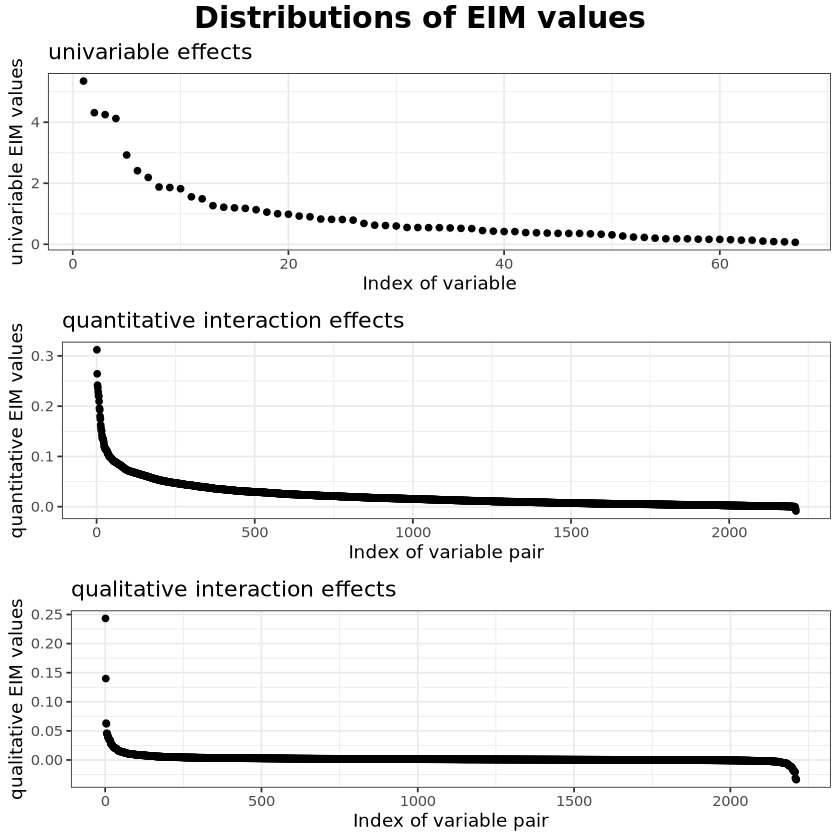

(Unadjusted) p-value: p = 0.0394190947201924 
(Unadjusted) p-value: p = 0.000586340640517673 


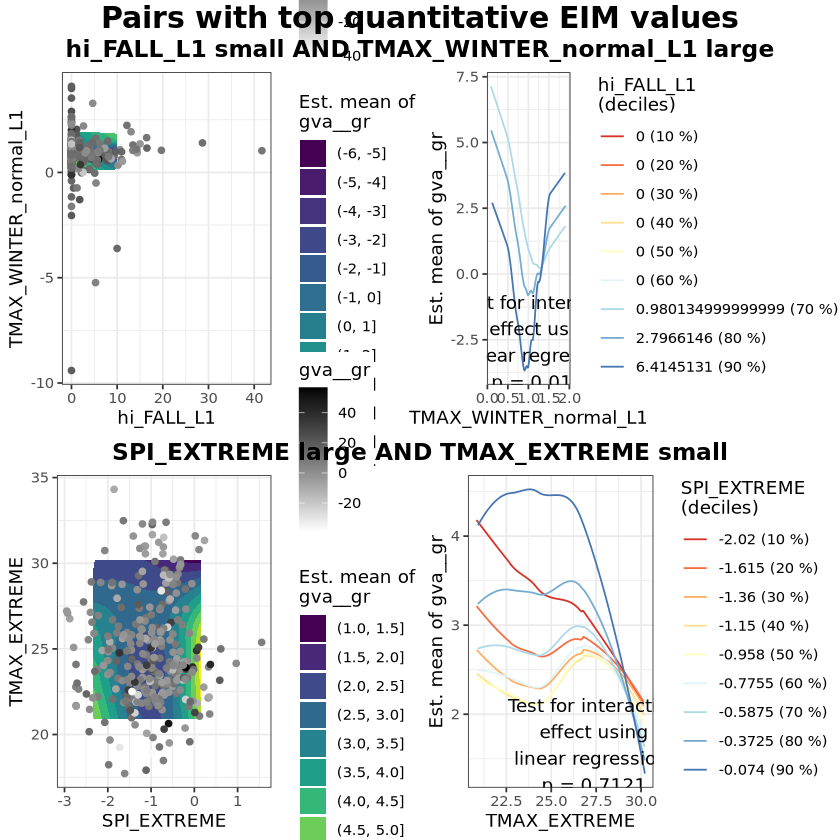

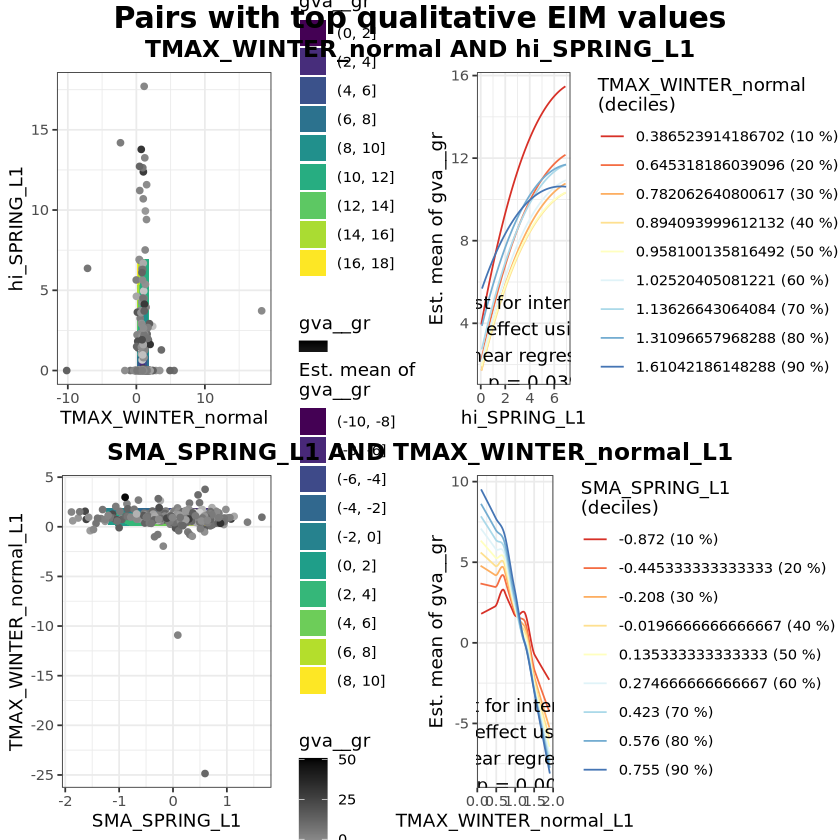

In [5]:
plot(model_df_agriculture)

In [7]:
plotPair(pair = c("SPI_EXTREME", "TMAX_EXTREME"), data = data_final_01)

In [52]:

model_df_agriculture$eim.univ.sorted[0:10]


TMAX_WINTER_normal_L1             cluster_C    TMAX_SPRING_normal 
             5.348696              4.312421              4.249902 
                  LAT             hi_SUMMER    TMAX_WINTER_normal 
             4.121618              2.925770              2.410871 
     TMAX_FALL_normal   TMAX_FALL_normal_L1              SMA_FALL 
             2.189890              1.877007              1.860071 
         hi_WINTER_L1 
             1.821031

In [54]:
model_df_agriculture$eim.quant.sorted[0:10]

hi_FALL_L1 small AND TMAX_WINTER_normal_L1 large 
                                       0.3122484 
        SPI_EXTREME large AND TMAX_EXTREME small 
                                       0.2643646 
               SPI_SUMMER_L1 large AND LAT large 
                                       0.2418604 
           SPI_SUMMER small AND Nearby_SPI small 
                                       0.2366915 
  SPI_FALL large AND TMAX_WINTER_normal_L1 large 
                                       0.2288102 
                   LAT large AND cluster_C large 
                                       0.2215330 
            TMAX_FALL_normal large AND LON large 
                                       0.2194452 
                  LON small AND gdp_no_gva large 
                                       0.2095967 
          hi_SUMMER_L1 small AND Nearby_HI small 
                                       0.1960059 
  TMAX_FALL_normal_L1 small AND Nearby_LF1 small 
                                       0.1926911

In [25]:
model_df_agriculture$eim.qual.sorted[0:10]

SMA_WINTER AND TMAX_WINTER_normal_L1           TMAX_SPRING_normal AND LAT 
                          0.14145094                           0.14051318 
 TMAX_SUMMER_normal_L1 AND Nearby_HI    TMAX_FALL_normal AND hi_WINTER_L1 
                          0.09295153                           0.09147199 
   TMAX_FALL AND TMAX_FALL_normal_L1         LFI_WINTER AND SPI_SUMMER_L1 
                          0.06477147                           0.06343149 
TMAX_WINTER_normal AND SPI_SUMMER_L1            hi_FALL AND LFI_SPRING_L1 
                          0.05546253                           0.05271229 
    LFI_WINTER_L1 AND Nearby_TMAX_L1      LFI_SPRING_L1 AND SPI_SUMMER_L1 
                          0.04861435                           0.04760090

Press [enter] for next plot. 


(Unadjusted) p-value: p = 2.42320314802202e-08 
(Unadjusted) p-value: p = 0.250370451379723 


Press [enter] for next plot. 


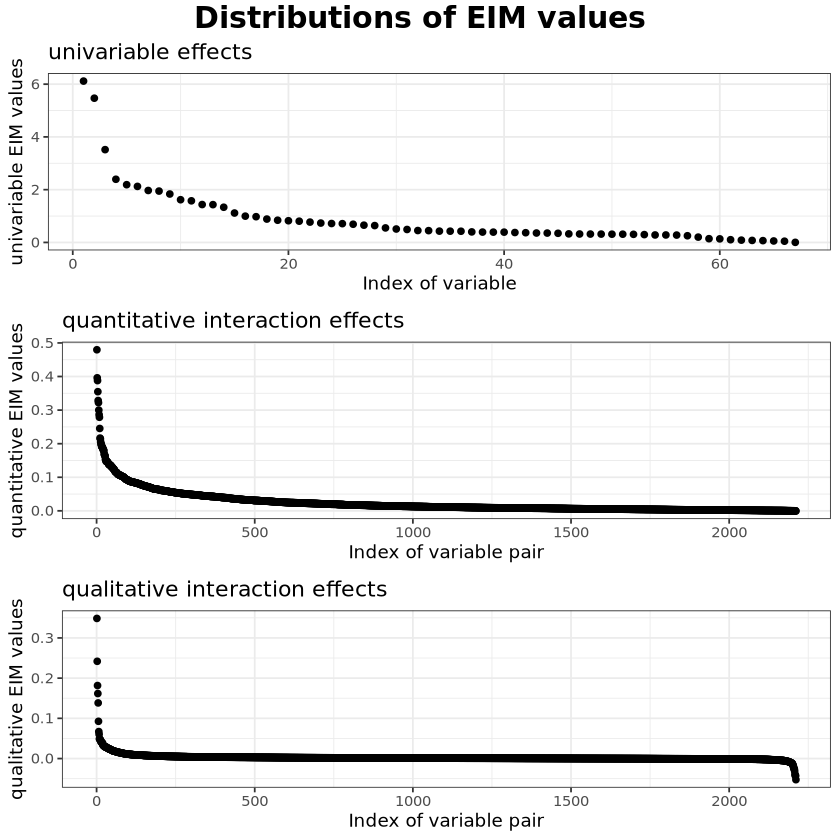

(Unadjusted) p-value: p = 4.78167727139354e-23 
(Unadjusted) p-value: p = 5.98848585121405e-09 


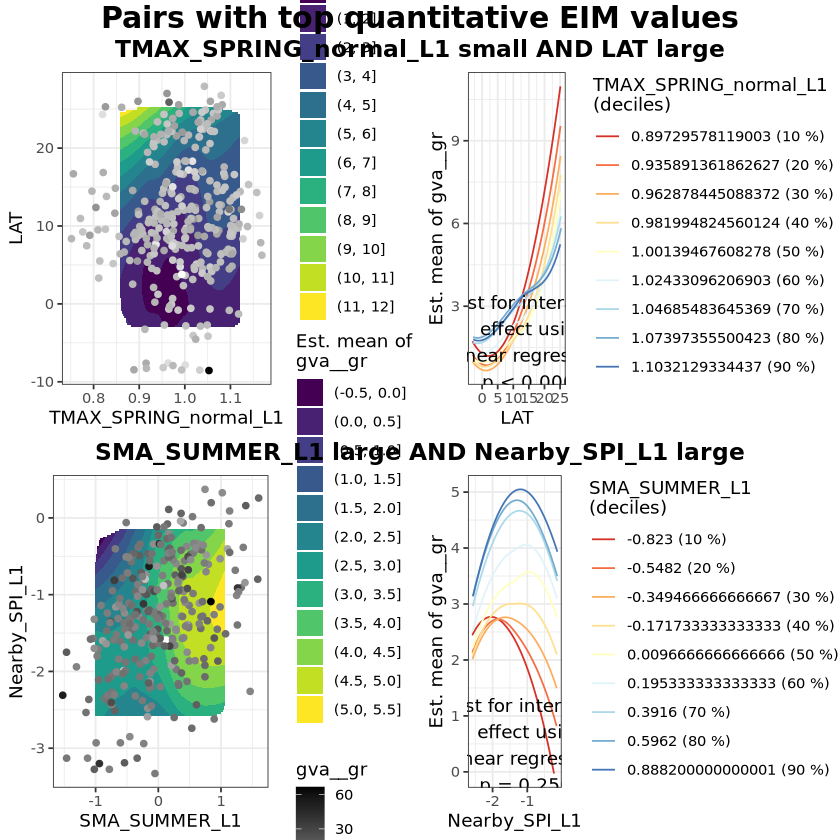

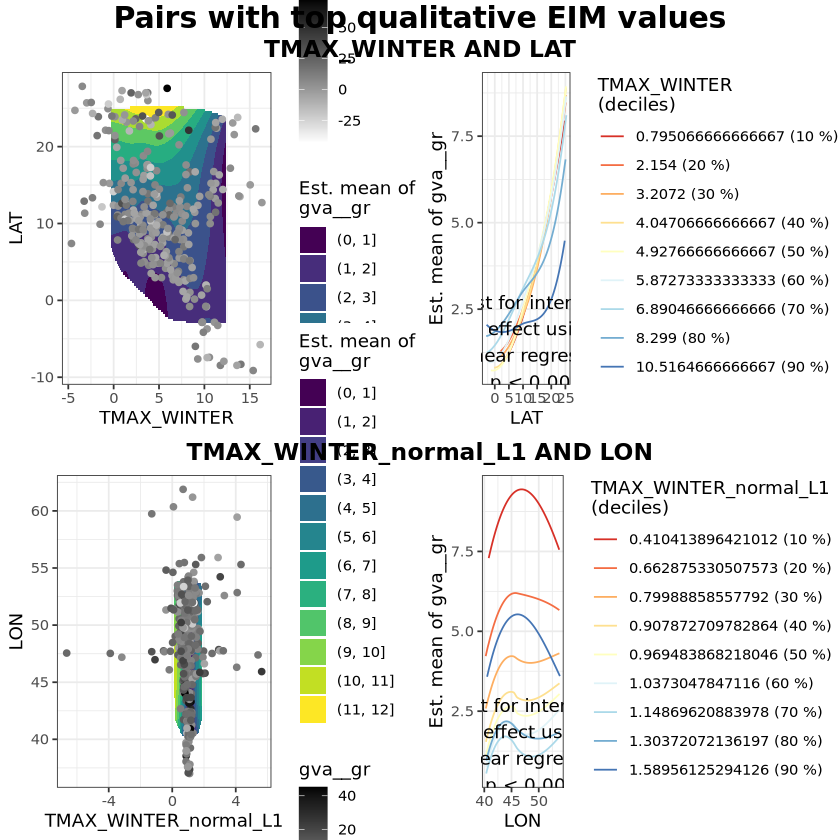

In [18]:
plot(model_df_agriculture, numpairsquant = 2)

[1] 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
[16] 2017 2018 2019 2020 2021

[1] "The rmse on the growth rate of the GVA in the agricultural sector in 2018 and 2021 is 9.92767518129784 ppt"


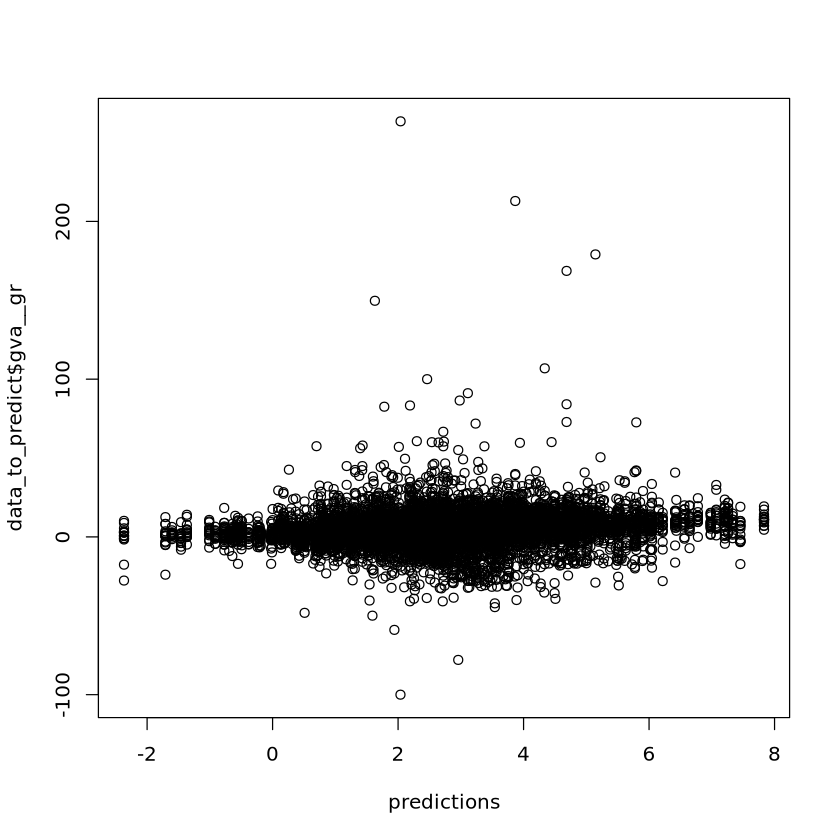

In [112]:
### prediction with the new data on year 2018 and 2021
### since our models predict current year with current variables
## we cannot predict 2022 

data_to_predict<- read.csv('Final_Data_With_New_Years.csv',sep=';')

data_to_predict<-data_to_predict[data_to_predict$sector=='C',]

unique(data_to_predict$year)

## predict years 2018 and 2021
data_to_predict <- data_to_predict[data_to_predict$year %in% c(2018,2021),]

data_econ <- read.csv('econ_data_full.csv')


data_to_predict<-merge(x = data_to_predict, y = data_econ, by = c("geo","year"), all.x = TRUE)

data_to_predict<-merge(x = data_to_predict, y = clusters_econ, by = c("geo"), all.x = TRUE)
data_to_predict<-merge(x = data_to_predict, y = cluster_climate_variables, by = c("geo"), all.x = TRUE)

vars_to_drop<-c('X','sector.x','sector.y','gdp.x',
                'gdp.y','country','gva','gva_emp_gr','gva_emp',
'empl','GVA',
                'country','gdp.y','cluster_A')

data_to_predict <- data_to_predict %>% select(-vars_to_drop)


data_to_predict <- data_to_predict %>% rename('area.x'='area')

data_to_predict<-drop_na(data_to_predict)
years<-data_to_predict$year
geo<-data_to_predict$geo

data_to_predict$year<-NULL

data_to_predict$geo<-NULL

predictions <- predict(model_df_agriculture,data_to_predict)$predictions

plot(predictions,
     data_to_predict$gva__gr)

print(paste('The rmse on the growth rate of the GVA in the agricultural sector in 2018 and 2021 is',rmse(predictions,
     data_to_predict$gva__gr),'ppt'))

data_to_predict$prediction=predictions

data_to_predict$year=years
data_to_predict$geo=geo

In [113]:
data_final_prediction<-data_to_predict%>%select(c('geo','year','gva__gr','prediction'))

write.csv(data_final_prediction,'predictions_manifacture.csv')

In [114]:
data_final_prediction

geo   year gva__gr    prediction
1     AT112 2018  3.6295645 0.9861226 
2     AT112 2018 -0.5973716 0.9861226 
3     AT112 2018  1.0000000 0.9861226 
4     AT112 2018  7.4007220 0.9861226 
5     AT112 2018  1.4272122 0.9861226 
6     AT112 2018  6.5671642 0.9861226 
7     AT112 2018  4.5498548 0.9861226 
8     AT112 2018  1.6483516 0.9861226 
9     AT113 2018 -5.4054054 1.9075442 
10    AT113 2018  5.4166667 1.9075442 
11    AT113 2018  3.5714286 1.9075442 
12    AT113 2018  2.5575448 1.9075442 
13    AT113 2018  2.7789654 1.9075442 
14    AT113 2018 -2.2099448 1.9075442 
15    AT113 2018  6.0606061 1.9075442 
16    AT113 2018  4.1570439 1.9075442 
17    AT121 2018  4.3062201 2.0408429 
18    AT121 2018  5.5432373 2.0408429 
19    AT121 2018  4.2028986 2.0408429 
20    AT121 2018 -2.4935512 2.0408429 
21    AT121 2018  2.0883859 2.0408429 
22    AT121 2018  6.6334992 2.0408429 
23    AT121 2018 -3.9274924 2.0408429 
24    AT121 2018 -2.3200000 2.0408429 
25    AT122 2018  4.7752809 1.4974868 
26    AT122 2018  3.8461538 1.4974868 
27    AT122 2018  5.6239957 1.4974868 
28    AT122 2018  5.4298643 1.4974868 
29    AT122 2018  8.1132075 1.4974868 
30    AT122 2018  6.1977716 1.4974868 
⋮     ⋮     ⋮    ⋮          ⋮         
12124 SK041 2018 12.0482975 4.282342  
12125 SK041 2018  8.8951528 4.282342  
12126 SK041 2018 13.4308995 4.282342  
12127 SK041 2018 14.5390957 4.282342  
12128 SK041 2018 16.2313785 4.282342  
12129 SK041 2018 15.3512667 4.282342  
12130 SK041 2018 15.6214754 4.282342  
12131 SK041 2018 16.2639702 4.282342  
12132 SK041 2018 27.5679528 4.282342  
12133 SK041 2018  6.8344681 4.282342  
12134 SK041 2018  6.7424687 4.282342  
12135 SK041 2018 16.4257538 4.282342  
12136 SK041 2018  4.6133301 4.282342  
12137 SK041 2018 -4.4974343 4.282342  
12138 SK041 2018  7.2686284 4.282342  
12139 SK042 2018 10.5425070 3.701358  
12140 SK042 2018  1.6582908 3.701358  
12141 SK042 2018 -4.6488204 3.701358  
12142 SK042 2018  1.5918275 3.701358  
12143 SK042 2018  8.7122959 3.701358  
12144 SK042 2018 -2.7744946 3.701358  
12145 SK042 2018  6.0281633 3.701358  
12146 SK042 2018  0.2008538 3.701358  
12147 SK042 2018  0.6051505 3.701358  
12148 SK042 2018 10.0623307 3.701358  
12149 SK042 2018 10.2569920 3.701358  
12150 SK042 2018 -2.9743509 3.701358  
12151 SK042 2018  3.5489961 3.701358  
12152 SK042 2018  4.5174732 3.701358  
12153 SK042 2018  1.2019865 3.701358